In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/cyberbullying-classification

 71% 2.00M/2.82M [00:01<00:00, 2.19MB/s]
100% 2.82M/2.82M [00:01<00:00, 2.52MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cyberbullying-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df.duplicated().sum()

36

In [ ]:
df.drop_duplicates()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df.shape

(47692, 2)

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

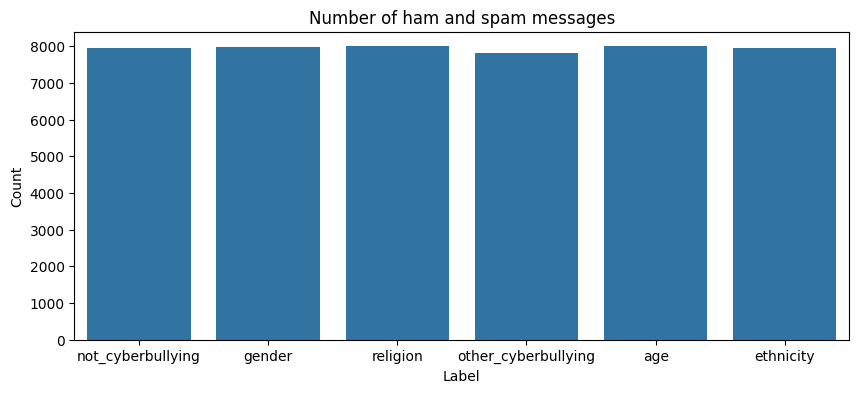

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='cyberbullying_type',data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of ham and spam messages')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in set(stopwords.words('english'))]))
print(df['tweet_text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0              words #katandandre, food crapilicious! #mkr
1        #aussietv white? #MKR #theblock #ImACelebrityA...
2        @XochitlSuckkks classy whore? red velvet cupca...
3        @Jason_Gio meh. :P thanks heads up, concerned ...
4        @RudhoeEnglish ISIS account pretending Kurdish...
                               ...                        
47687    Black ppl expected anything, depended anything...
47688    Turner withhold disappointment. Turner called ...
47689    swear God. dumb nigger bitch. got bleach hair ...
47690    Yea fuck RT @therealexel: YOURE NIGGER FUCKING...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 47692, dtype: object


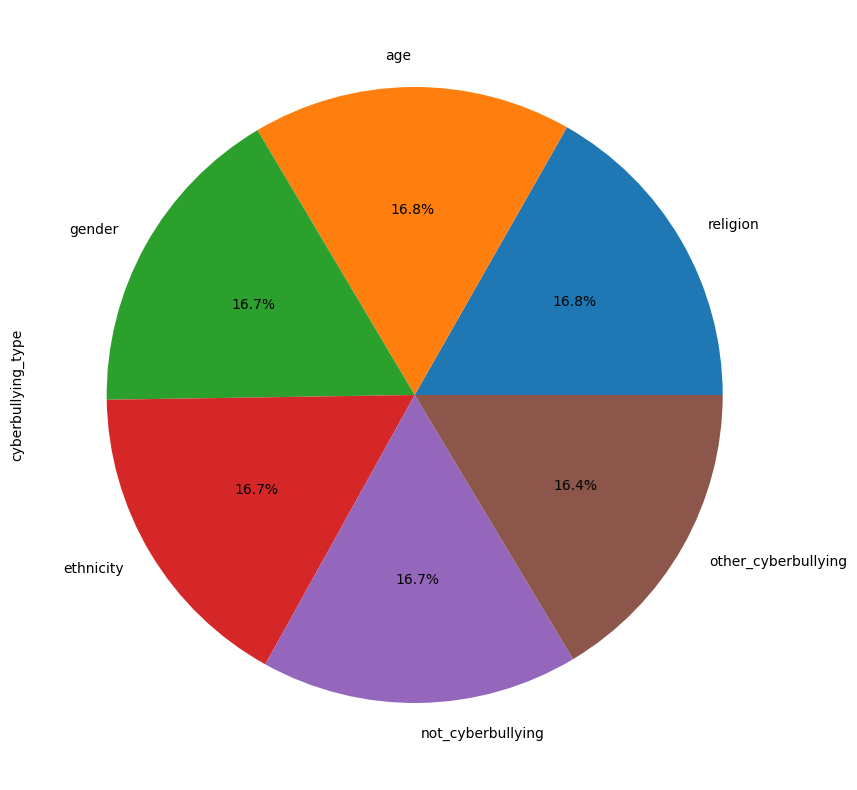

In [ ]:
plt.figure(figsize=(10, 10))
df['cyberbullying_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
# explore the datasets
def explore_data(data):
    for i in range(5):
        print("Sample Comment:-\n",data['tweet_text'][i])
        print("-----------------------------------------------------------")
        print("Sample Label:-\n",data['cyberbullying_type'][i])
        print("-----------------------------------------------------------")

    # analyse the length of text
    text_len = [len(text) for text in data['tweet_text']]
    print("Average length of text:-",np.mean(text_len))
    print("Max length of text:-",np.max(text_len))
    print("Min length of text:-",np.min(text_len))
    print("Standard deviation of length of text:-",np.std(text_len))
    print("Median length of text:-",np.median(text_len))
    print("25 percentile of length of text:-",np.percentile(text_len,25))
    print("75 percentile of length of text:-",np.percentile(text_len,75))
    print("-----------------------------------------------------------")

In [ ]:
explore_data(df)

Sample Comment:-
 words #katandandre, food crapilicious! #mkr
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
 #aussietv white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
 @XochitlSuckkks classy whore? red velvet cupcakes?
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
 @Jason_Gio meh. :P thanks heads up, concerned another angry dude twitter.
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
 @RudhoeEnglish ISIS

In [ ]:
unique_types = df['cyberbullying_type'].unique()
print(unique_types)


['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']


In [ ]:
import re

In [ ]:
# remove punctuation
remove_punctuations = [
    "/::\)","/::","(-_-)","(*_*)","(>_<)",":)",";)",":P","xD","-_-","#","(>_<)","...",".",",",";",":","!","?","'","অ�", "অাবার", "।","?",
    "\"","-","_","/","\\","|","{","}","[","]","(",")","<",">","@","#","$","%","^","&","*","~","`","+","=","0","1","2","3","4","5","6","7","8","9","৳","০",
    "১","২","৩","৪","৫","৬","৭","৮","৯","\n","\t","\r","\f","\v","\u00C0-\u017F","\u2000-\u206F","\u25A0-\u25FF","\u2600-\u26FF","\u2B00-\u2BFF","\u3000-\u303F",
    "\uFB00-\uFB4F","\uFE00-\uFE0F","\uFE30-\uFE4F","\u1F600-\u1F64F","\u1F300-\u1F5FF","\u1F680-\u1F6FF","\u1F1E0-\u1F1FF","\u2600-\u26FF","\u2700-\u27BF",
    "\u1F300-\u1F5FF","\u1F900-\u1F9FF","\u1F600-\u1F64F","\u1F680-\u1F6FF","\u1F1E0-\u1F1FF","\u1F600-\u1F64F",
]
# reset index of the dataframe
df.reset_index(inplace=True)

In [ ]:
for i in range(len(df)):
    text = df.loc[i,'tweet_text']
    for punctuation in remove_punctuations:
        text = text.replace(punctuation,' ')
    df.loc[i,'tweet_text'] = text

In [ ]:
# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)

In [ ]:
# remove emoji
for i in range(len(df)):
    text = df.loc[i,'tweet_text']
    text = remove_emoji(text)
    df.loc[i,'tweet_text'] = text

In [ ]:
# remove extra space
def remove_extra_space(text):
    extra_space = re.compile("\s+")
    return extra_space.sub(r" ", text)

In [ ]:
# remove extra space
for i in range(len(df)):
    text = df.loc[i,'tweet_text']
    text = remove_extra_space(text)
    df.loc[i,'tweet_text'] = text

In [ ]:
explore_data(df)

Sample Comment:-
 words katandandre food crapilicious mkr
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
  aussietv white MKR theblock ImACelebrityAU today sunrise studio Neighbours WonderlandTen etc
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
  XochitlSuckkks classy whore red velvet cupcakes 
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
  Jason Gio meh thanks heads up concerned another angry dude twitter 
-----------------------------------------------------------
Sample Label:-
 not_cyberbullying
-----------------------------------------------------------
Sample Comment:-
  RudhoeEnglish ISIS account pretending Ku

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import TFBertForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.layers import Embedding
%matplotlib inline

In [ ]:
le = LabelEncoder()
df['cyberbullying_type'] = le.fit_transform(df['cyberbullying_type'])

labels = to_categorical(df['cyberbullying_type'], num_classes=6)

df.head()

,index,tweet_text,cyberbullying_type
0,0,words katandandre food crapilicious mkr,3
1,1,aussietv white MKR theblock ImACelebrityAU to...,3
2,2,XochitlSuckkks classy whore red velvet cupcakes,3
3,3,Jason Gio meh thanks heads up concerned anoth...,3
4,4,RudhoeEnglish ISIS account pretending Kurdish...,3


In [ ]:
df['cyberbullying_type'].value_counts()

5    7998
0    7992
2    7973
1    7961
3    7945
4    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['tweet_text'].tolist(), df['cyberbullying_type'].tolist(), test_size=0.2)

In [ ]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example sentence to tokenize
sentence = "This is an example sentence to tokenize."

# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Print tokens and token IDs
print("Tokens:", tokens)
print("Token IDs:", token_ids)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokens: ['this', 'is', 'an', 'example', 'sentence', 'to', 'token', '##ize', '.']
Token IDs: [2023, 2003, 2019, 2742, 6251, 2000, 19204, 4697, 1012]


In [ ]:
max_length = 128
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors="tf")

In [ ]:
num_labels = len(df['cyberbullying_type'].unique())

In [ ]:
from transformers import TFBertModel
import tensorflow as tf

In [ ]:
# Assuming train_encodings and test_encodings contain input_ids
train_input_ids = train_encodings['input_ids']
test_input_ids = test_encodings['input_ids']

# Trim or pad sequences to the desired length (128)
max_length = 128
train_input_ids = tf.keras.preprocessing.sequence.pad_sequences(train_input_ids, maxlen=max_length, padding='post')
test_input_ids = tf.keras.preprocessing.sequence.pad_sequences(test_input_ids, maxlen=max_length, padding='post')


In [ ]:
# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'sequences': train_input_ids,
        'attention_mask': train_encodings['attention_mask']
    },
    tf.keras.utils.to_categorical(train_labels, num_labels)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'sequences': test_input_ids,
        'attention_mask': test_encodings['attention_mask']
    },
    tf.keras.utils.to_categorical(test_labels, num_labels)
))

In [ ]:
# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_labels)
test_labels_onehot = to_categorical(test_labels, num_labels)

In [ ]:
from tensorflow.keras.layers import Input, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras import regularizers

In [ ]:
vocab_size = tokenizer.vocab_size
embedding_dim = 300

In [ ]:
def GRUmodelWithoutBERTEmbeddings(vocab_size, embedding_dim=128, sequence_length=128):
    sequences = Input(shape=(sequence_length,), dtype=tf.int32, name="sequences")  # Update input shape

    embedded_sequences = Embedding(vocab_size, embedding_dim)(sequences)
    # GRU layers
    x = Bidirectional(GRU(256, return_sequences=True, recurrent_activation='sigmoid'))(embedded_sequences)
    x = Dropout(0.5)(x)
    x = Bidirectional(GRU(128, recurrent_activation='sigmoid'))(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

    # Dense layers
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    num_classes = len(set(train_labels))  # Ensure train_labels are accessible here
    x = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=sequences, outputs=x)

In [ ]:
vocab_size = tokenizer.vocab_size
model = GRUmodelWithoutBERTEmbeddings(vocab_size, sequence_length=128)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequences (InputLayer)      [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          3906816   
                                                                 
 bidirectional (Bidirection  (None, 128, 512)          592896    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 512)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               493056    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                16448 

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes=len(set(train_labels)))
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=len(set(test_labels)))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_encodings['input_ids'],
    train_labels_onehot,
    validation_data=(test_encodings['input_ids'],
                     test_labels_onehot),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
1193/1193 [==============================] - 70s 50ms/step - loss: 0.7582 - accuracy: 0.7094 - val_loss: 0.4954 - val_accuracy: 0.7799
Epoch 2/10
1193/1193 [==============================] - 43s 36ms/step - loss: 0.4558 - accuracy: 0.8028 - val_loss: 0.4746 - val_accuracy: 0.7943
Epoch 3/10
1193/1193 [==============================] - 40s 34ms/step - loss: 0.3913 - accuracy: 0.8442 - val_loss: 0.4864 - val_accuracy: 0.8196
Epoch 4/10
1193/1193 [==============================] - 42s 35ms/step - loss: 0.3466 - accuracy: 0.8729 - val_loss: 0.4875 - val_accuracy: 0.8216
Epoch 5/10
1193/1193 [==============================] - 45s 38ms/step - loss: 0.2909 - accuracy: 0.8984 - val_loss: 0.5011 - val_accuracy: 0.8261


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_dataset.batch(32))
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Get predictions for test data
predictions = model.predict(test_dataset.batch(32))
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


299/299 [==============================] - 55s 12ms/step - loss: 0.4746 - accuracy: 0.7943
Test Accuracy: 79.43%
Test Loss: 0.4746
299/299 [==============================] - 5s 12ms/step


In [ ]:
# Calculate TP, FP, TN, FN for each class
for i, class_name in enumerate(class_names):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - tp - fp - fn

    print(f"\nClass: {class_name}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")

In [ ]:
# Convert true classes to binary format
label_binarizer = LabelBinarizer()
true_labels_bin = label_binarizer.fit_transform(true_classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = len(label_binarizer.classes_)

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(true_labels_bin[:, i], predictions[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

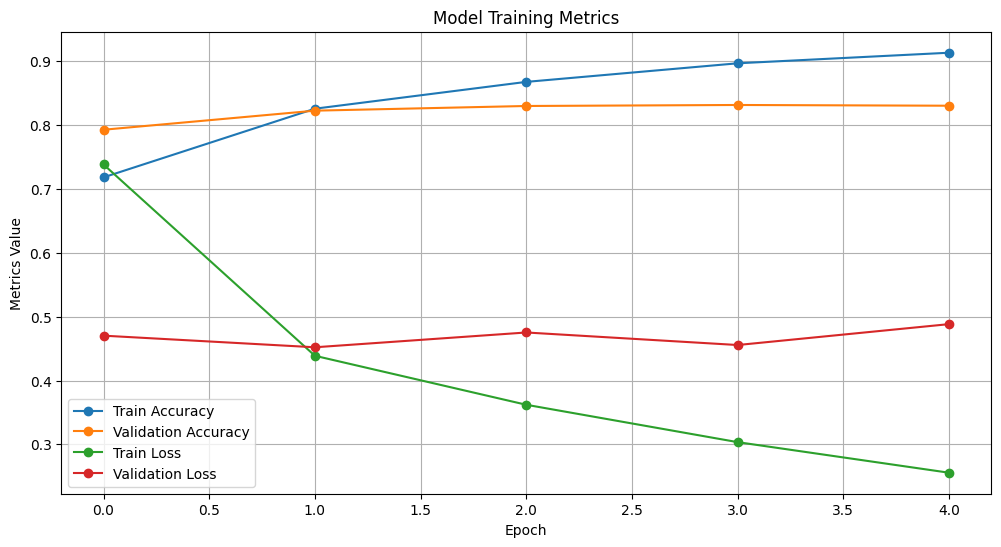

In [ ]:
# Plot training & validation accuracy and loss values in a single plot
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Plot loss
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')

plt.title('Model Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1583
           1       0.99      0.97      0.98      1565
           2       0.88      0.85      0.87      1623
           3       0.55      0.53      0.54      1553
           4       0.61      0.64      0.62      1569
           5       0.93      0.97      0.95      1646

    accuracy                           0.82      9539
   macro avg       0.82      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539

Confusion Matrix:
 [[1522    0   16   17   24    4]
 [   6 1520    8   11   14    6]
 [   2    1 1383  181   41   15]
 [  23    4   63  829  552   82]
 [  13    7   99  443 1000    7]
 [   1    4    5   38    4 1594]]


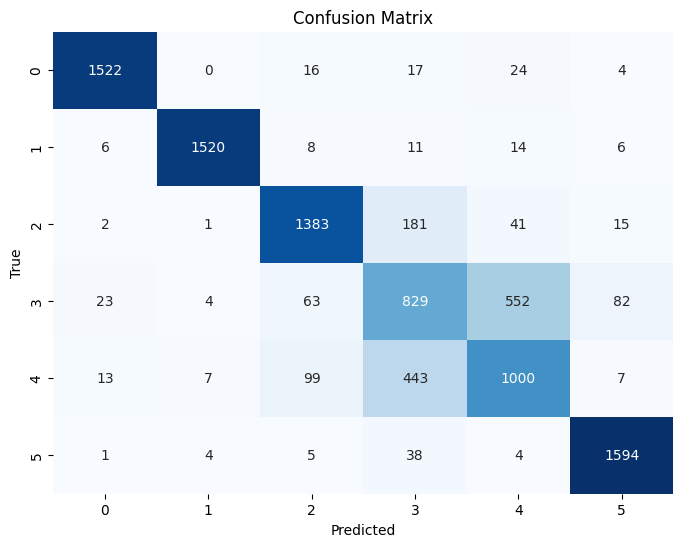

In [ ]:
# Classification Report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Precision, Recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

Precision: 0.8235
Recall: 0.8227
F1-score: 0.8230


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score

299/299 [==============================] - 4s 13ms/step


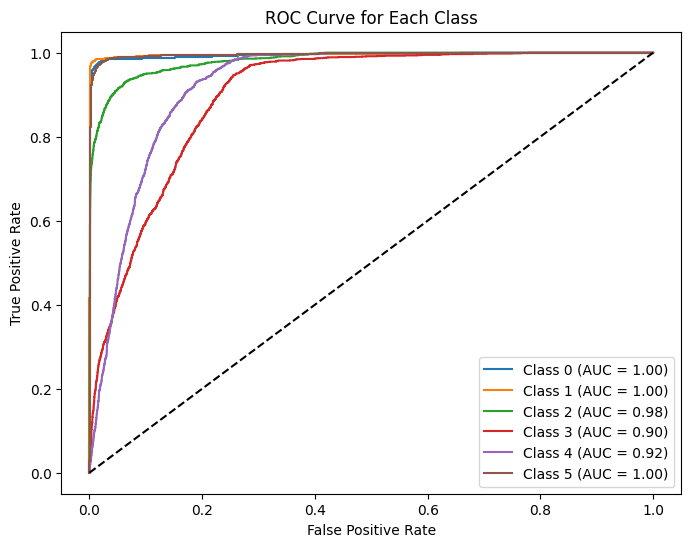

In [ ]:
# Get predictions for test data
predictions = model.predict(test_dataset.batch(32))
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels

# Transform true labels to binary format
label_binarizer = LabelBinarizer()
true_labels_bin = label_binarizer.fit_transform(true_classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = len(label_binarizer.classes_)

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(true_labels_bin[:, i], predictions[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Embedding, Input
from tensorflow.keras.models import Model

In [ ]:
def LSTM_Model(vocab_size, embedding_dim=128, sequence_length=128):
    # Define input layer
    sequences = Input(shape=(sequence_length,), dtype=tf.int32, name="sequences")

    embedded_sequences = Embedding(vocab_size, embedding_dim)(sequences)

    # LSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True))(embedded_sequences)
    x = Dropout(0.5)(x)

    # Add another LSTM layer
    x = Bidirectional(LSTM(64))(x)
    x = Dropout(0.5)(x)

    # Dense layers
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    num_classes = len(set(train_labels))  # Ensure train_labels are accessible here
    x = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=sequences, outputs=x)

In [ ]:
# Create the model
vocab_size = tokenizer.vocab_size
model = LSTM_Model(vocab_size)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequences (InputLayer)      [(None, 128)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 128, 128)          3906816   
                                                                 
 bidirectional_4 (Bidirecti  (None, 128, 256)          263168    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128, 256)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)               0   

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model.fit(
    train_encodings['input_ids'],
    train_labels_onehot,
    validation_data=(test_encodings['input_ids'],
                     test_labels_onehot),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
1193/1193 [==============================] - 67s 50ms/step - loss: 0.6473 - accuracy: 0.7242 - val_loss: 0.4425 - val_accuracy: 0.7976
Epoch 2/10
1193/1193 [==============================] - 38s 32ms/step - loss: 0.4221 - accuracy: 0.8094 - val_loss: 0.4325 - val_accuracy: 0.8168
Epoch 3/10
1193/1193 [==============================] - 39s 33ms/step - loss: 0.3539 - accuracy: 0.8574 - val_loss: 0.4435 - val_accuracy: 0.8207
Epoch 4/10
1193/1193 [==============================] - 37s 31ms/step - loss: 0.2846 - accuracy: 0.8909 - val_loss: 0.4993 - val_accuracy: 0.8245
Epoch 5/10
1193/1193 [==============================] - 36s 30ms/step - loss: 0.2478 - accuracy: 0.9088 - val_loss: 0.5195 - val_accuracy: 0.8242


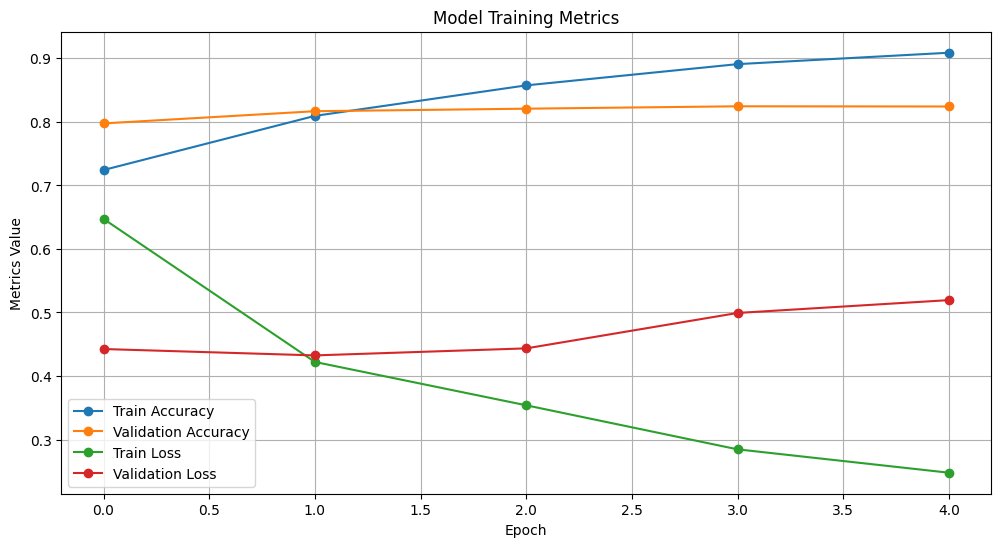

In [ ]:
# Plot training & validation accuracy and loss values in a single plot
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(history_1.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Plot loss
plt.plot(history_1.history['loss'], label='Train Loss', marker='o')
plt.plot(history_1.history['val_loss'], label='Validation Loss', marker='o')

plt.title('Model Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1583
           1       0.99      0.97      0.98      1565
           2       0.88      0.85      0.87      1623
           3       0.55      0.53      0.54      1553
           4       0.61      0.64      0.62      1569
           5       0.93      0.97      0.95      1646

    accuracy                           0.82      9539
   macro avg       0.82      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539

Confusion Matrix:
 [[1522    0   16   17   24    4]
 [   6 1520    8   11   14    6]
 [   2    1 1383  181   41   15]
 [  23    4   63  829  552   82]
 [  13    7   99  443 1000    7]
 [   1    4    5   38    4 1594]]


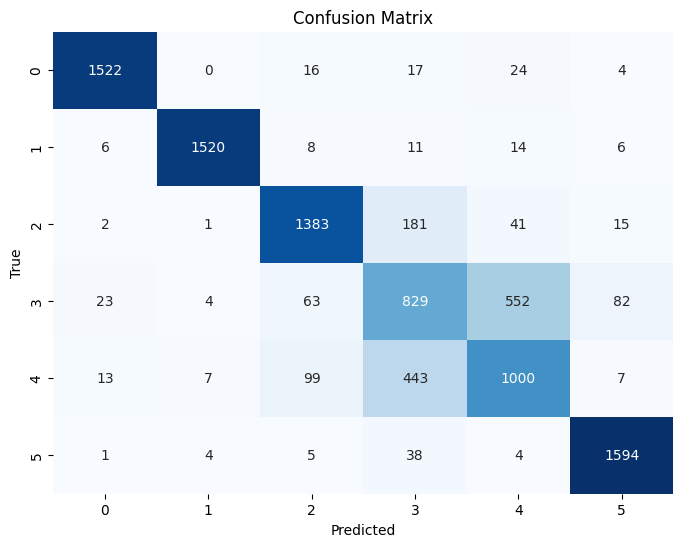

In [ ]:
# Classification Report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_dataset.batch(32))
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


299/299 [==============================] - 5s 11ms/step - loss: 0.4325 - accuracy: 0.8168
Test Accuracy: 81.68%
Test Loss: 0.4325


In [ ]:
# Precision, Recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

Precision: 0.8235
Recall: 0.8227
F1-score: 0.8230


In [ ]:
# Get predictions for test data
predictions = model.predict(test_dataset.batch(32))
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.multiclass import unique_labels

# Convert predicted classes to class names
class_names = ["Not Bully", "Troll", "Sexual", "Religious", "Threat"]
predicted_class_names = [class_names[i] for i in predicted_classes]

# Convert true classes to class names
true_class_names = [class_names[i] for i in true_classes]

# Confusion Matrix
cm = confusion_matrix(true_class_names, predicted_class_names)

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(len(classes)),
           yticks=np.arange(len(classes)),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Plot non-normalized confusion matrix
plot_confusion_matrix(true_class_names, predicted_class_names, classes=np.array(class_names),
                      title='Confusion Matrix, without normalization')

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


299/299 [==============================] - 5s 12ms/step


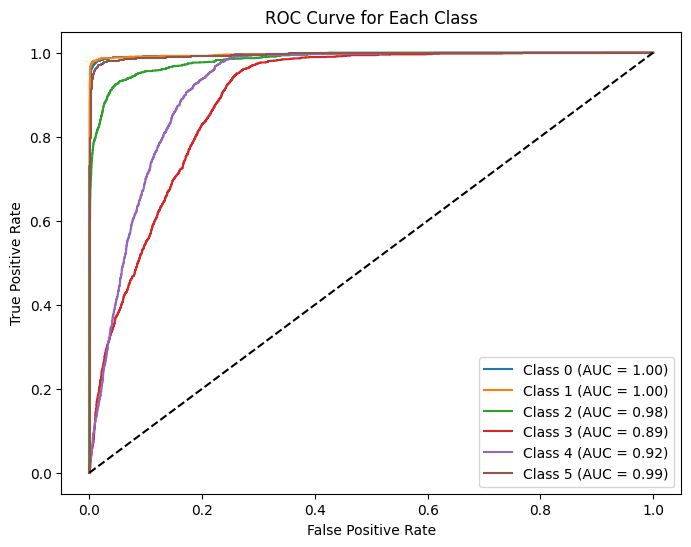

In [ ]:


# Convert true classes to binary format
label_binarizer = LabelBinarizer()
true_labels_bin = label_binarizer.fit_transform(true_classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = len(label_binarizer.classes_)

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(true_labels_bin[:, i], predictions[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
def CNNmodel(vocab_size, embedding_dim=128, sequence_length=128):
    # Define input layer
    sequences = Input(shape=(sequence_length,), dtype=tf.int32, name="sequences")  # Update input shape

    embedded_sequences = Embedding(vocab_size, embedding_dim)(sequences)

    # 1D Convolution layers
    x = Conv1D(128, 5, activation='relu')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(5)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    # Output layer
    num_classes = len(set(train_labels))
    x = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=sequences, outputs=x)

In [ ]:
# Create the model
vocab_size = tokenizer.vocab_size
model = CNNmodel(vocab_size)
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequences (InputLayer)      [(None, 128)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 128, 128)          3906816   
                                                                 
 conv1d (Conv1D)             (None, 124, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                      

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

In [ ]:
history_2 = model.fit(train_encodings['input_ids'], train_labels_onehot,
                    validation_data=(test_encodings['input_ids'], test_labels_onehot),
                    epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
1193/1193 [==============================] - 37s 27ms/step - loss: 0.5843 - accuracy: 0.7504 - val_loss: 0.4296 - val_accuracy: 0.8000
Epoch 2/10
1193/1193 [==============================] - 14s 12ms/step - loss: 0.3417 - accuracy: 0.8625 - val_loss: 0.4041 - val_accuracy: 0.8333
Epoch 3/10
1193/1193 [==============================] - 12s 10ms/step - loss: 0.2491 - accuracy: 0.9021 - val_loss: 0.4506 - val_accuracy: 0.8299
Epoch 4/10
1193/1193 [==============================] - 12s 10ms/step - loss: 0.1875 - accuracy: 0.9258 - val_loss: 0.5102 - val_accuracy: 0.8264
Epoch 5/10
1193/1193 [==============================] - 12s 10ms/step - loss: 0.1411 - accuracy: 0.9423 - val_loss: 0.6329 - val_accuracy: 0.8159
Epoch 5: early stopping


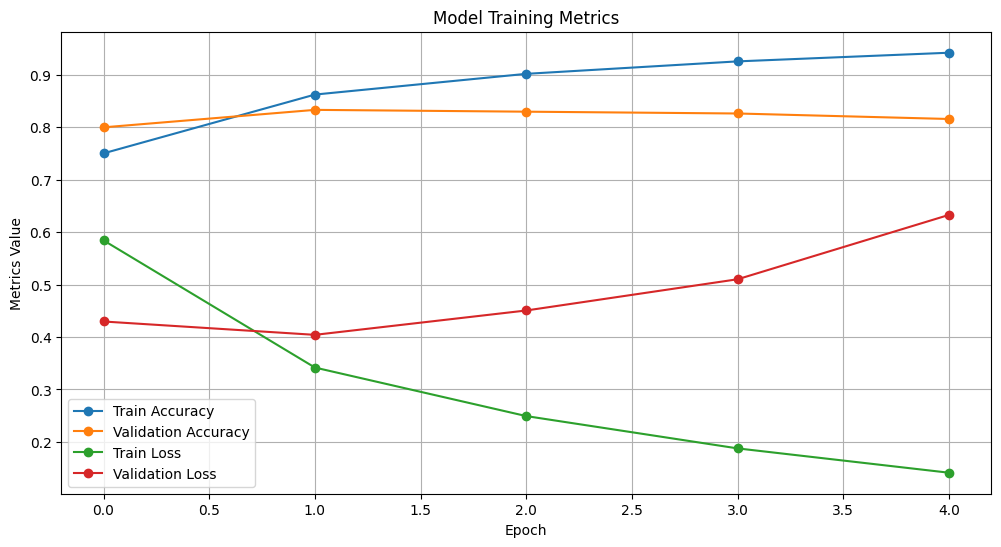

In [ ]:
# Plot training & validation accuracy and loss values in a single plot
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(history_2.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Plot loss
plt.plot(history_2.history['loss'], label='Train Loss', marker='o')
plt.plot(history_2.history['val_loss'], label='Validation Loss', marker='o')

plt.title('Model Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(True)
plt.show()

 41/299 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


299/299 [==============================] - 1s 2ms/step


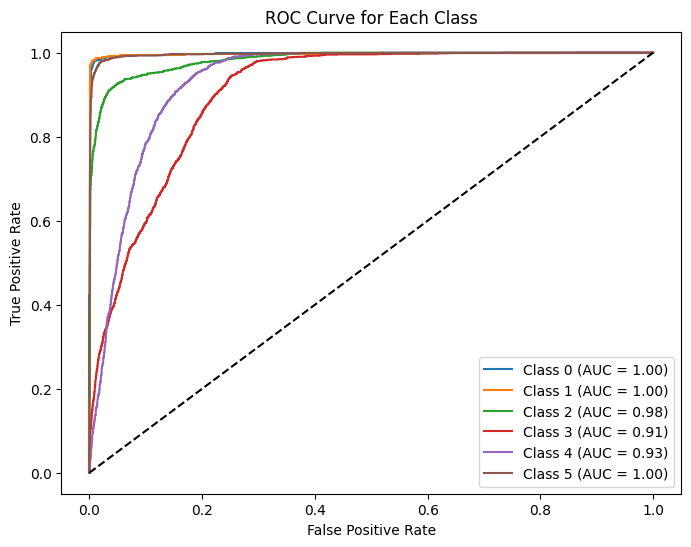

In [ ]:
# Get predictions for test data
predictions = model.predict(test_dataset.batch(32))
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels

# Transform true labels to binary format
label_binarizer = LabelBinarizer()
true_labels_bin = label_binarizer.fit_transform(true_classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_labels = len(label_binarizer.classes_)

for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(true_labels_bin[:, i], predictions[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

  1/299 [..............................] - ETA: 51s - loss: 0.3298 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


299/299 [==============================] - 1s 4ms/step - loss: 0.4041 - accuracy: 0.8333
Test Accuracy: 83.33%
Test Loss: 0.4041
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1583
           1       0.97      0.98      0.97      1565
           2       0.89      0.87      0.88      1623
           3       0.60      0.46      0.52      1553
           4       0.62      0.73      0.67      1569
           5       0.93      0.97      0.95      1646

    accuracy                           0.83      9539
   macro avg       0.83      0.83      0.83      9539
weighted avg       0.83      0.83      0.83      9539

Confusion Matrix:
 [[1551    2    1   12   15    2]
 [   3 1537    2    8   11    4]
 [  10    2 1420  103   84    4]
 [  48   22   94  712  584   93]
 [  14   23   73  307 1140   12]
 [   1    6    7   39    4 1589]]


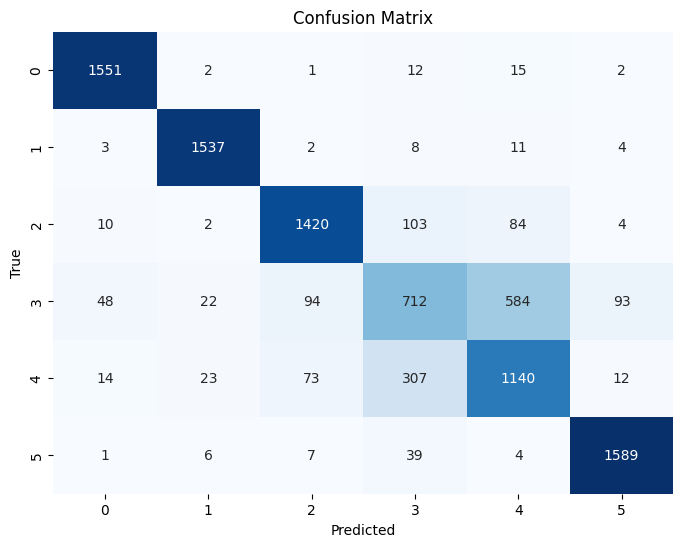

Precision: 0.8290
Recall: 0.8333
F1-score: 0.8287


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_dataset.batch(32))
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Classification Report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision, Recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

In [ ]:
models = {'GRU': GRUmodelWithoutBERTEmbeddings(tokenizer.vocab_size),
          'LSTM': LSTM_Model(tokenizer.vocab_size),
          'CNN': CNNmodel(tokenizer.vocab_size)}

In [ ]:
histories = {}  # To store training histories of each model

for name, model in models.items():
    print(f"Training {name} model...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_encodings['input_ids'], train_labels_onehot, epochs=10, batch_size=32)
    histories[name] = history

Training GRU model...
Epoch 1/10
1193/1193 [==============================] - 64s 44ms/step - loss: 0.7481 - accuracy: 0.7164
Epoch 2/10
1193/1193 [==============================] - 35s 30ms/step - loss: 0.4263 - accuracy: 0.8393
Epoch 3/10
1193/1193 [==============================] - 35s 29ms/step - loss: 0.3498 - accuracy: 0.8754
Epoch 4/10
1193/1193 [==============================] - 35s 29ms/step - loss: 0.2931 - accuracy: 0.8996
Epoch 5/10
1193/1193 [==============================] - 34s 29ms/step - loss: 0.2479 - accuracy: 0.9167
Epoch 6/10
1193/1193 [==============================] - 34s 29ms/step - loss: 0.2229 - accuracy: 0.9249
Epoch 7/10
1193/1193 [==============================] - 34s 28ms/step - loss: 0.1988 - accuracy: 0.9325
Epoch 8/10
1193/1193 [==============================] - 34s 29ms/step - loss: 0.1871 - accuracy: 0.9362
Epoch 9/10
1193/1193 [==============================] - 34s 28ms/step - loss: 0.1599 - accuracy: 0.9428
Epoch 10/10
1193/1193 [===================

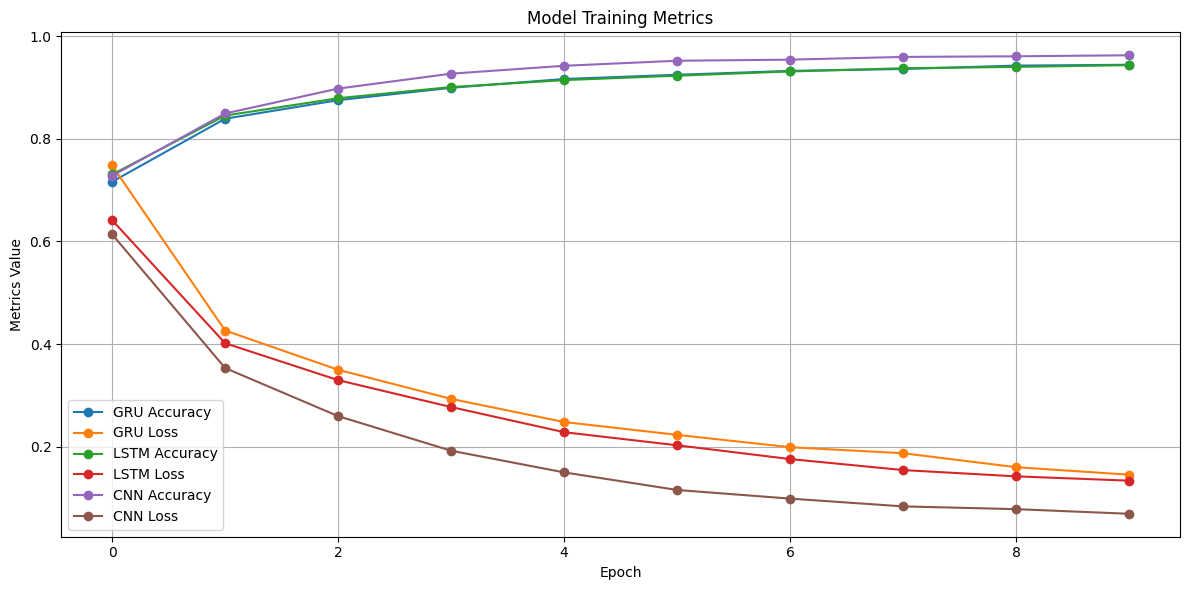

In [ ]:
# Plot training & validation accuracy and loss values in a single plot
plt.figure(figsize=(12, 6))

for name, history in histories.items():
  plt.plot(history.history['accuracy'], label=f'{name} Accuracy', marker='o')
  plt.plot(history.history['loss'], label=f'{name} Loss', marker='o')
  plt.title('Model Training Metrics')
  plt.xlabel('Epoch')
  plt.ylabel('Metrics Value')
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
train_predictions = {}
test_predictions = {}

for name, model in models.items():
    train_predictions[name] = model.predict(train_encodings['input_ids'])
    test_predictions[name] = model.predict(test_encodings['input_ids'])

299/299 [==============================] - 1s 4ms/step


In [ ]:
stacked_train_predictions = np.column_stack([train_predictions[name] for name in models])
stacked_test_predictions = np.column_stack([test_predictions[name] for name in models])

In [ ]:
stacked_train, stacked_val, train_labels_train, train_labels_val = train_test_split(
    stacked_train_predictions,
    train_labels_onehot,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest model
rf_meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)
rf_meta_learner.fit(stacked_train, train_labels_train)
rf_meta_predictions = rf_meta_learner.predict(stacked_val)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(train_labels_val, rf_meta_predictions)
print(f"Accuracy of Random Forest meta-learner: {accuracy * 100:.2f}%")

Accuracy of Random Forest meta-learner: 94.48%


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
rf_train_predictions = rf_meta_learner.predict(stacked_train)
train_accuracy = accuracy_score(train_labels_train, rf_train_predictions)
print(f"Training Accuracy of Random Forest meta-learner: {train_accuracy * 100:.2f}%")

# Predictions on the validation set
rf_val_predictions = rf_meta_learner.predict(stacked_val)
val_accuracy = accuracy_score(train_labels_val, rf_val_predictions)
print(f"Validation Accuracy of Random Forest meta-learner: {val_accuracy * 100:.2f}%")


Training Accuracy of Random Forest meta-learner: 97.70%
Validation Accuracy of Random Forest meta-learner: 94.48%


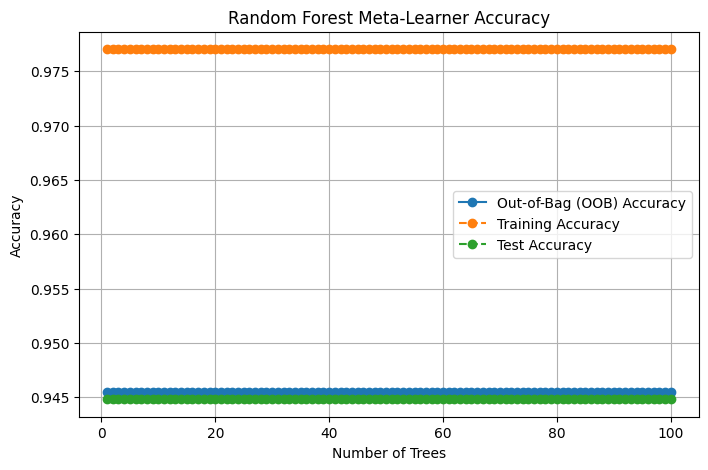

In [ ]:
# Initialize the Random Forest model with oob_score=True
rf_meta_learner = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_meta_learner.fit(stacked_train, train_labels_train)

# Access the overall OOB score
oob_score = rf_meta_learner.oob_score_

# Predictions on the validation set
rf_val_predictions = rf_meta_learner.predict(stacked_val)
val_accuracy = accuracy_score(train_labels_val, rf_val_predictions)

# Plotting training and validation accuracies
plt.figure(figsize=(8, 5))
n_estimators = len(rf_meta_learner.estimators_)
epochs = range(1, n_estimators + 1)

plt.plot(epochs, [oob_score] * n_estimators, label='Out-of-Bag (OOB) Accuracy', marker='o')
plt.plot(epochs, [train_accuracy] * n_estimators, label='Training Accuracy', linestyle='--', marker='o')
plt.plot(epochs, [val_accuracy] * n_estimators, label='Test Accuracy', linestyle='--', marker='o')

plt.title('Random Forest Meta-Learner Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(train_labels_val, rf_meta_predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

Precision: 0.9457
Recall: 0.9448
F1-score: 0.9452


In [ ]:
from sklearn.metrics import roc_curve, auc

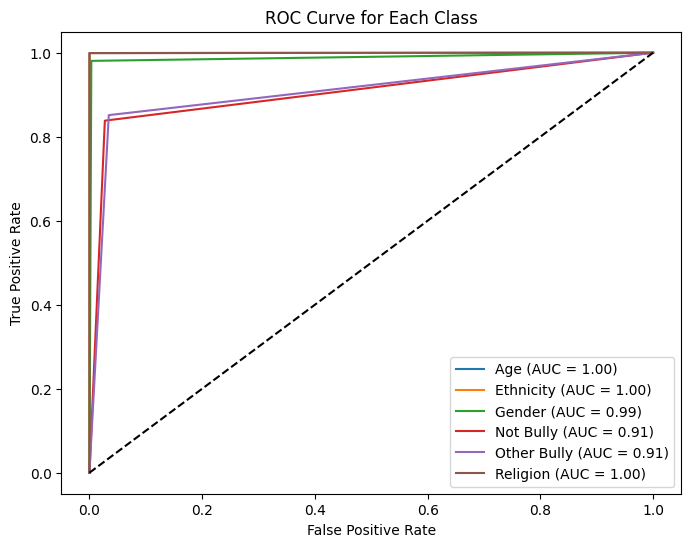

In [ ]:
from sklearn.preprocessing import label_binarize

if len(train_labels_val.shape) > 1 and train_labels_val.shape[1] > 1:
    train_labels_val = np.argmax(train_labels_val, axis=1)

# Binarize the labels for multiclass ROC calculation
label_binarizer = label_binarize(train_labels_val, classes=np.unique(train_labels_val))

# Calculate ROC curve for the Random Forest meta-learner
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(label_binarizer.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(label_binarizer[:, i], rf_meta_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

class_names = ["Age", "Ethnicity", "Gender", "Not Bully", "Other Bully", "Religion"]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(label_binarizer.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization


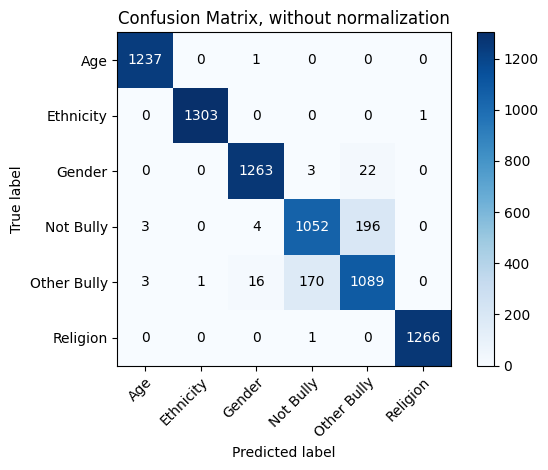

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.multiclass import unique_labels

# Convert predicted classes to class names
class_names = ["Age", "Ethnicity", "Gender", "Not Bully", "Other Bully", "Religion"]
# Round the predicted probabilities to get class labels
rounded_predictions = np.argmax(rf_meta_predictions, axis=1)

# Convert predicted classes to class names
predicted_class_names = [class_names[i] for i in rounded_predictions]

# Convert true classes to class names
true_class_names = [class_names[i] for i in train_labels_val]

# Confusion Matrix
cm = confusion_matrix(true_class_names, predicted_class_names)

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(len(classes)),
           yticks=np.arange(len(classes)),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Plot non-normalized confusion matrix
plot_confusion_matrix(true_class_names, predicted_class_names, classes=class_names,
                      title='Confusion Matrix, without normalization')

plt.show()


In [ ]:
# Calculate TP, FP, TN, FN for each class
for i, class_name in enumerate(class_names):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - tp - fp - fn

    print(f"\nClass: {class_name}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")


Class: Age
True Positives (TP): 1237
False Positives (FP): 6
True Negatives (TN): 6387
False Negatives (FN): 1

Class: Ethnicity
True Positives (TP): 1303
False Positives (FP): 1
True Negatives (TN): 6326
False Negatives (FN): 1

Class: Gender
True Positives (TP): 1263
False Positives (FP): 21
True Negatives (TN): 6322
False Negatives (FN): 25

Class: Not Bully
True Positives (TP): 1052
False Positives (FP): 174
True Negatives (TN): 6202
False Negatives (FN): 203

Class: Other Bully
True Positives (TP): 1089
False Positives (FP): 218
True Negatives (TN): 6134
False Negatives (FN): 190

Class: Religion
True Positives (TP): 1266
False Positives (FP): 1
True Negatives (TN): 6363
False Negatives (FN): 1


In [ ]:
from sklearn.preprocessing import LabelEncoder

if len(train_labels_val.shape) > 1 and train_labels_val.shape[1] > 1:
    train_labels_val = np.argmax(train_labels_val, axis=1)

# Use LabelEncoder to ensure train_labels_val is represented as integers
label_encoder = LabelEncoder()
train_labels_val_encoded = label_encoder.fit_transform(train_labels_val)

# Convert rf_meta_predictions to integer classes
rf_meta_predictions_int = np.argmax(rf_meta_predictions, axis=1)

# Ensure shapes align
print("Shapes - True Labels:", train_labels_val_encoded.shape, "Predictions:", rf_meta_predictions_int.shape)

# Then try calculating confusion matrix and classification report
conf_matrix = confusion_matrix(train_labels_val_encoded, rf_meta_predictions_int)
class_report = classification_report(train_labels_val_encoded, rf_meta_predictions_int)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Shapes - True Labels: (7631,) Predictions: (7631,)
Confusion Matrix:
 [[1275    0    0    0    0    0]
 [   0 1277    0    0    0    0]
 [   8    0 1223    6   17    0]
 [   5    0    3 1100  172    0]
 [   1    0   15  196 1037    0]
 [   1    0    0    0    0 1295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1275
           1       1.00      1.00      1.00      1277
           2       0.99      0.98      0.98      1254
           3       0.84      0.86      0.85      1280
           4       0.85      0.83      0.84      1249
           5       1.00      1.00      1.00      1296

    accuracy                           0.94      7631
   macro avg       0.94      0.94      0.94      7631
weighted avg       0.94      0.94      0.94      7631



In [ ]:
# Extract TP, TN, FP, FN from confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 1277
True Negatives: 1275
False Positives: 0
False Negatives: 0


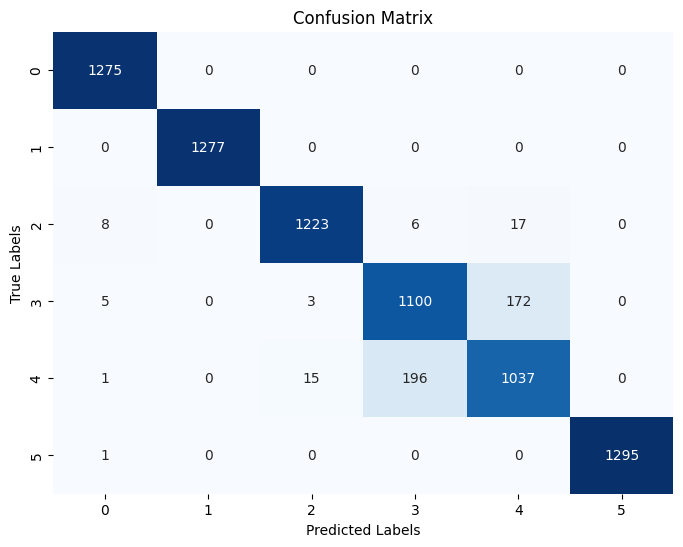

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming you have a tokenizer from the transformers library
from transformers import AutoTokenizer

# Replace 'bert-base-uncased' with the actual model name you used for tokenization
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Extract the tokenized sequence from 'sequences_data'
tokenized_sequence = sequences_data.numpy()[0]

# Decode the tokenized sequence back to text
decoded_text = tokenizer.decode(tokenized_sequence)

print(decoded_text)

[CLS]


In [ ]:
print(sequences_data)


tf.Tensor(
[  101  4286  3143 28781  6013 25805  2638  9164  7078  2025  5152 28781
  5025 28781  2036  2514  2489  2171  2812  2360  3563  4279  2028  2451
   102     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(128,), dtype=int32)
